###### Importing necessary libraries

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sys
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import silhouette_score ,calinski_harabasz_score , davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics

###### Import the dataset

In [171]:
data = pd.read_csv('wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


###### EDA

In [172]:
data.shape

(178, 13)

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [175]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [177]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:title={'center':'Feature correlation'}>

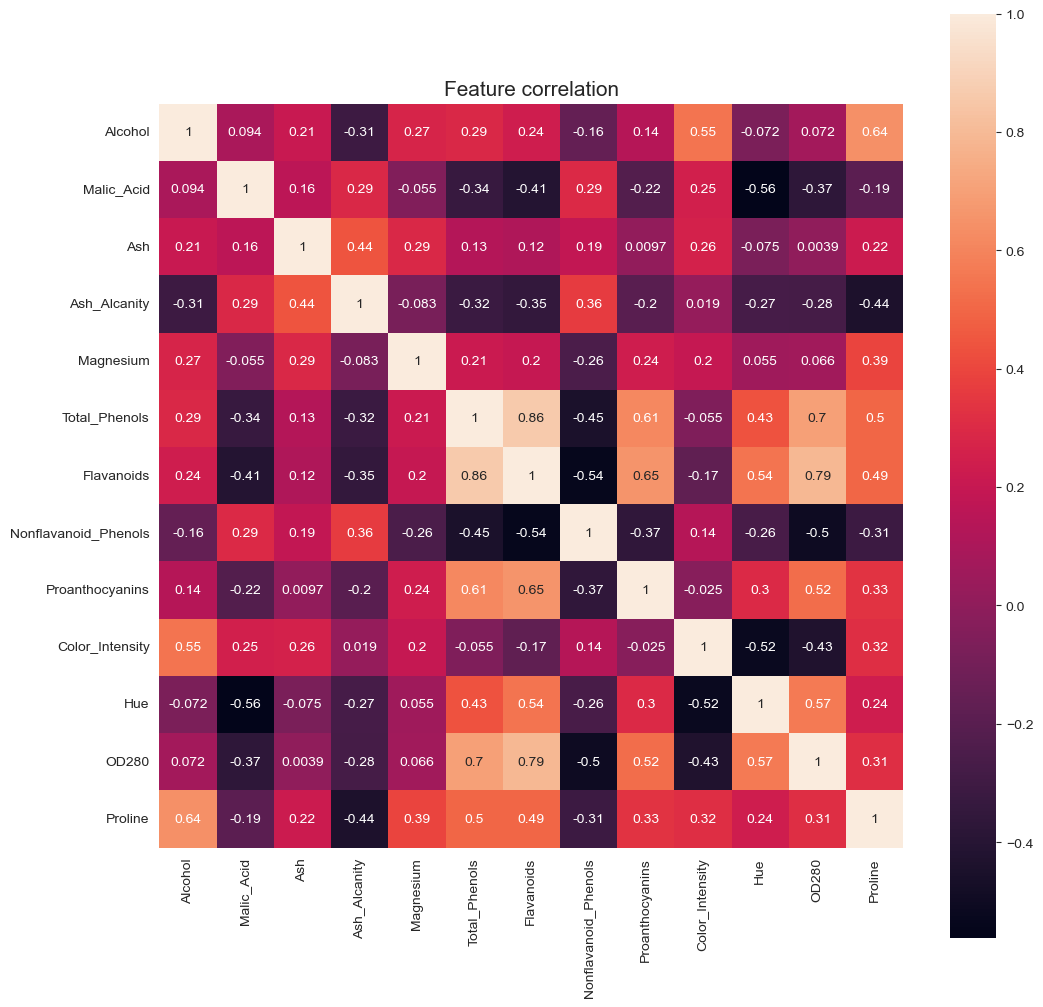

In [178]:
# check the feature correlations with heatmap
plt.figure(figsize=(12,12))
plt.title('Feature correlation', size=15)
sns.heatmap(data.corr(),vmax=1.0, square=True, annot=True)

###### Find Outliers and clean up

In [38]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

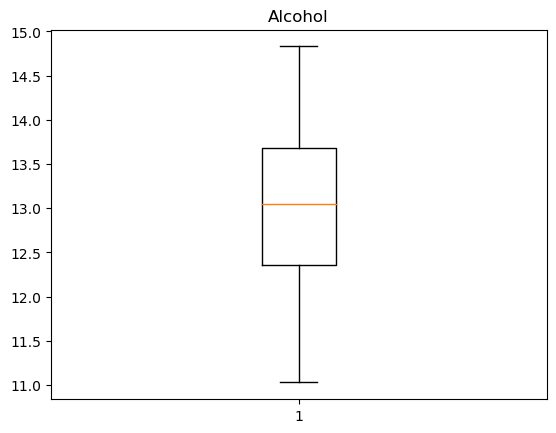

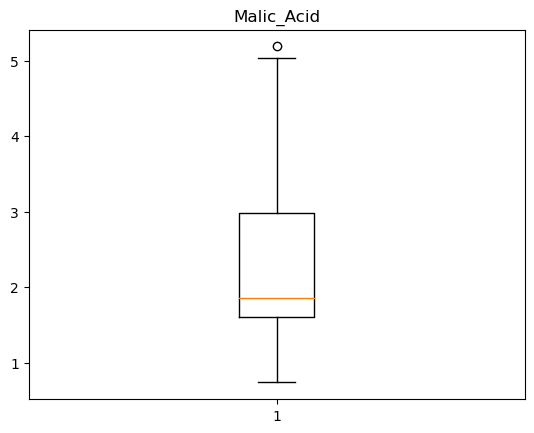

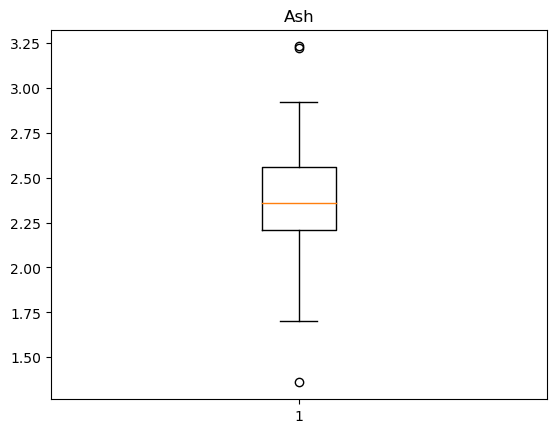

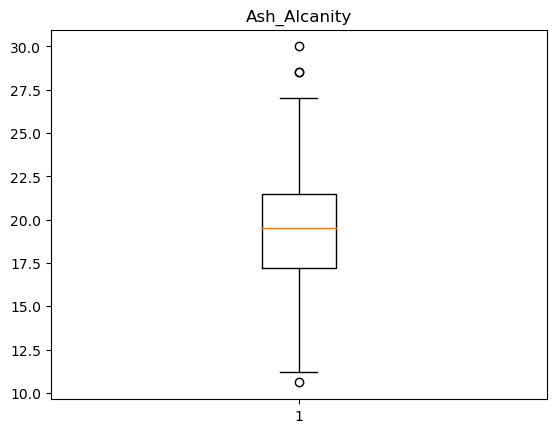

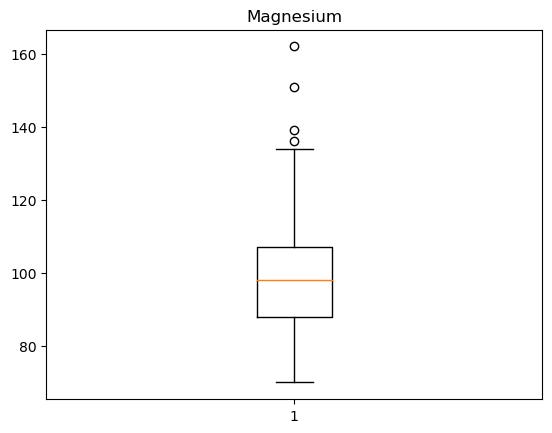

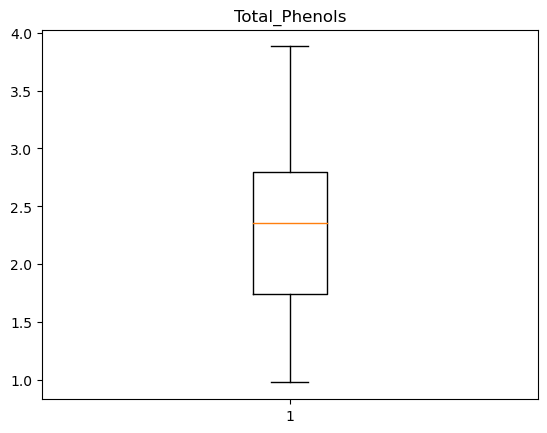

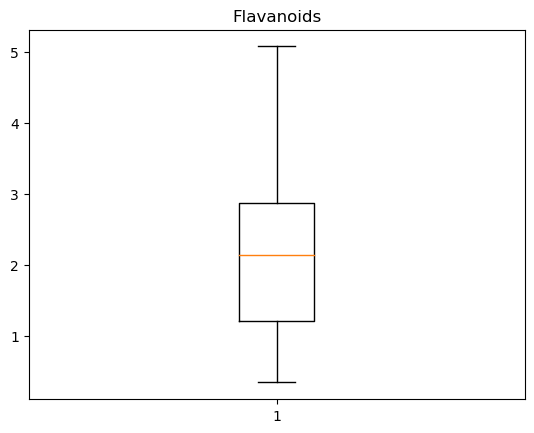

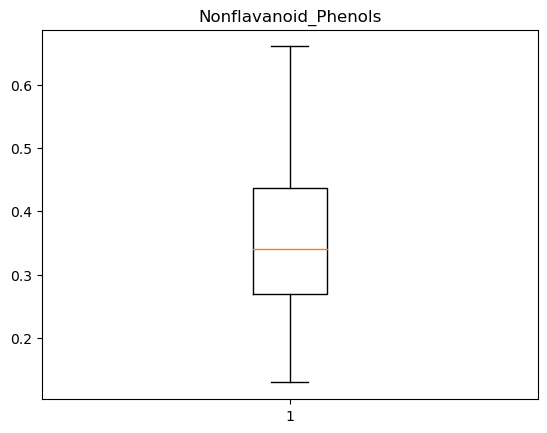

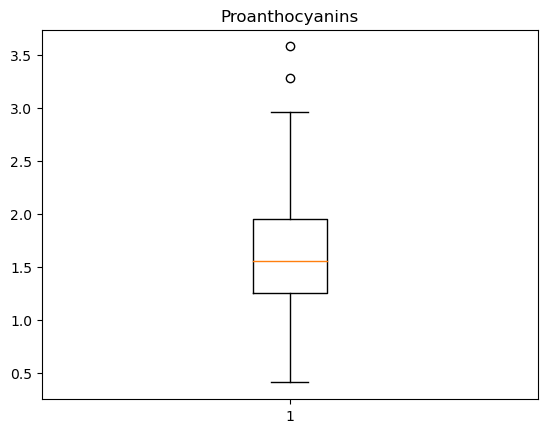

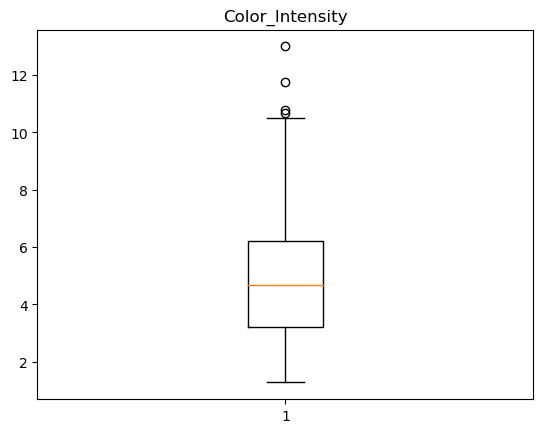

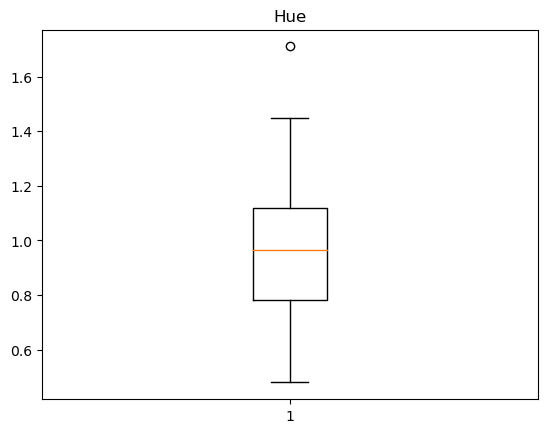

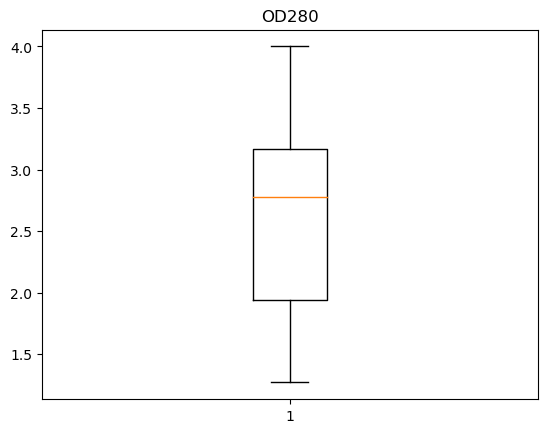

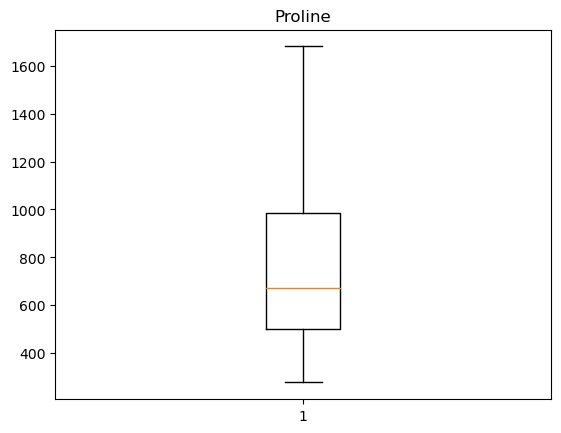

In [39]:
for i in ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [ ]:
#Malic_Acid,Ash,Ash_Alcanity,Magnesium,Proanthocyanins,Color_Intensity,Hue

In [ ]:
IQR=stats.iqr(data.Malic_Acid,interpolation='midpoint')
IQR

In [ ]:
Q1=data.Malic_Acid.quantile(0.25)
Q3=data.Malic_Acid.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

In [ ]:
data.loc[data.Malic_Acid>max_limit]

In [ ]:
data.loc[data.Malic_Acid<min_limit]

In [ ]:
data.loc[data['Malic_Acid']>max_limit,'Malic_Acid']=np.median(data.Malic_Acid)

In [ ]:
data.loc[data.Malic_Acid>max_limit]

In [179]:
IQR=stats.iqr(data.Ash,interpolation='midpoint')
IQR

0.34499999999999975

In [180]:
Q1=data.Ash.quantile(0.25)
Q3=data.Ash.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.6925000000000003, 3.0749999999999997)

In [181]:
data.loc[data.Ash>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [182]:
data.loc[data.Ash<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [187]:
data.loc[data['Ash']>max_limit,'Ash']=np.median(data.Ash)

In [185]:
data.loc[data.Ash>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [188]:
data.loc[data['Ash']<min_limit,'Ash']=np.median(data.Ash)

In [189]:
data.loc[data.Ash<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [190]:
IQR=stats.iqr(data.Hue,interpolation='midpoint')
IQR

0.3350000000000001

In [191]:
Q1=data.Hue.quantile(0.25)
Q3=data.Hue.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.2799999999999998, 1.6225000000000003)

In [192]:
data.loc[data.Hue>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
115,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


In [193]:
data.loc[data.Hue<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [194]:
data.loc[data['Hue']>max_limit,'Hue']=np.median(data.Hue)

In [195]:
data.loc[data.Hue>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [186]:
IQR=stats.iqr(data.Ash_Alcanity,interpolation='midpoint')
IQR

4.300000000000001

In [41]:
Q1=data.Ash_Alcanity.quantile(0.25)
Q3=data.Ash_Alcanity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(10.749999999999998, 27.950000000000003)

In [42]:
data.loc[data.Ash_Alcanity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


In [43]:
data.loc[data.Ash_Alcanity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [45]:
data.loc[data['Ash_Alcanity']>max_limit,'Ash_Alcanity']=np.median(data.Ash_Alcanity)

In [46]:
data.loc[data.Ash_Alcanity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [47]:
IQR=stats.iqr(data.Magnesium,interpolation='midpoint')
IQR

19.0

In [48]:
Q1=data.Magnesium.quantile(0.25)
Q3=data.Magnesium.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(59.5, 135.5)

In [49]:
data.loc[data.Magnesium>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,19.5,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [50]:
data.loc[data.Magnesium<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [51]:
data.loc[data['Magnesium']>max_limit,'Magnesium']=np.median(data.Magnesium)

In [52]:
data.loc[data.Magnesium>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [53]:
IQR=stats.iqr(data.Proanthocyanins,interpolation='midpoint')
IQR

0.7

In [54]:
Q1=data.Proanthocyanins.quantile(0.25)
Q3=data.Proanthocyanins.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.20000000000000018, 3.0)

In [55]:
data.loc[data.Proanthocyanins>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
95,12.47,1.52,2.20,19.0,98,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [56]:
data.loc[data.Proanthocyanins<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [57]:
data.loc[data['Proanthocyanins']>max_limit,'Proanthocyanins']=np.median(data.Proanthocyanins)

In [58]:
data.loc[data.Proanthocyanins>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [59]:
IQR=stats.iqr(data.Color_Intensity,interpolation='midpoint')
IQR

2.97

In [60]:
Q1=data.Color_Intensity.quantile(0.25)
Q3=data.Color_Intensity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.2350000000000003, 10.655000000000001)

In [61]:
data.loc[data.Color_Intensity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


In [62]:
data.loc[data.Color_Intensity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [63]:
data.loc[data['Color_Intensity']>max_limit,'Color_Intensity']=np.median(data.Color_Intensity)

In [64]:
data.loc[data.Color_Intensity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


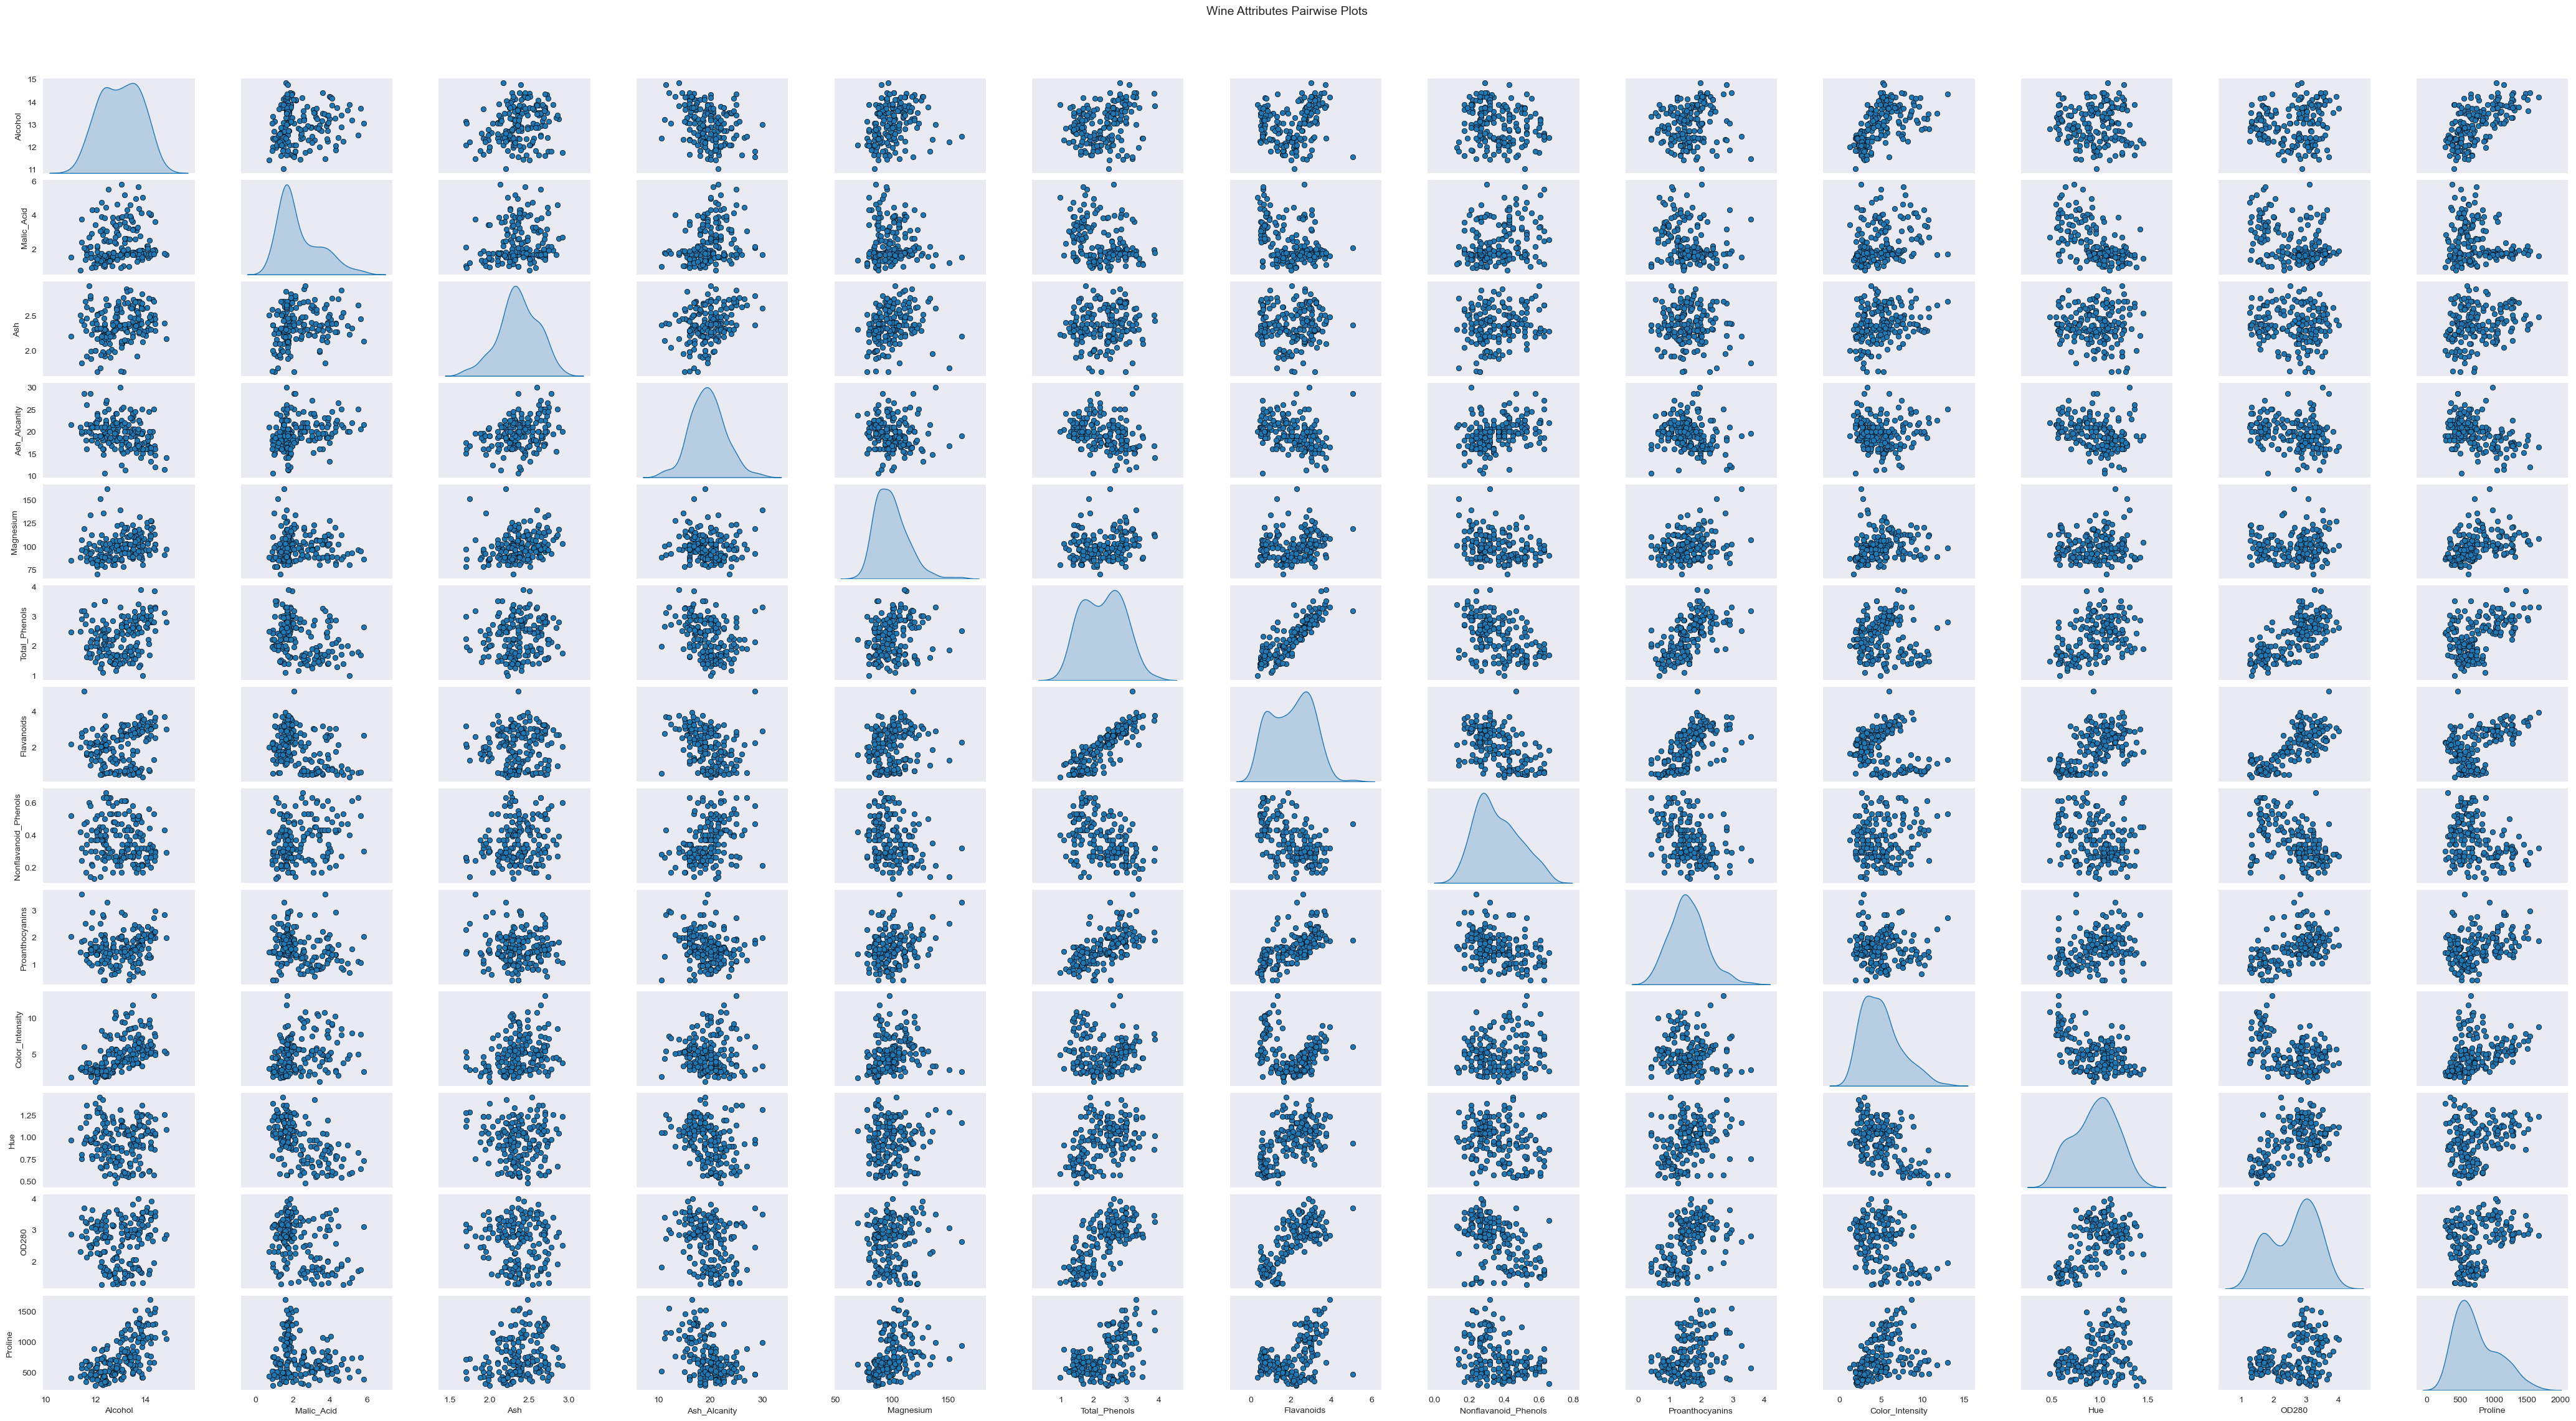

In [200]:
#plotting
cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
pp = sns.pairplot(data[cols], height=1.8, aspect=1.8,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

###### Scaling

In [198]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.27397068, ...,  0.392826  ,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.90162087, ...,  0.43811587,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.24687403, ...,  0.34753614,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.4151692 , ..., -1.6452181 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.03074484, ..., -1.59992823,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.5306375 , ..., -1.55463836,
        -1.42894777, -0.59516041]])

In [201]:
scaled_data = pd.DataFrame(scaled_data,columns = data.columns)

###### Creating Models

###### KMeans Clustering

In [202]:

wcss=[]
for i in range(1,13):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state =42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

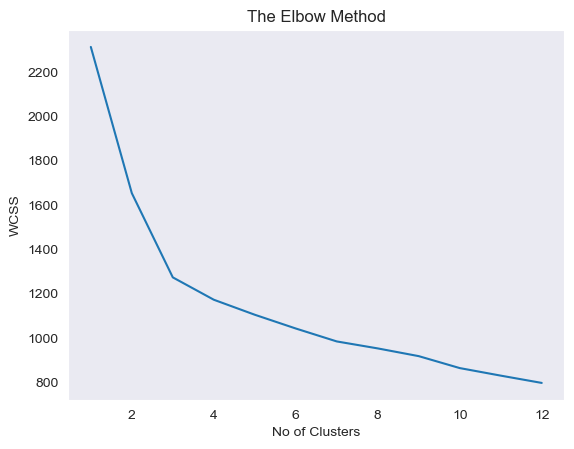

In [203]:
#find the optimum number of clusters by Elbow method
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

Analysis - Best value for cluster is 3

In [204]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state =42)
y_kmeans = kmeans.fit_predict(scaled_data)

In [91]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [205]:
# Data points count per label
unique, counts = np.unique(y_kmeans, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 67],
       [ 1, 60],
       [ 2, 51]], dtype=int64)

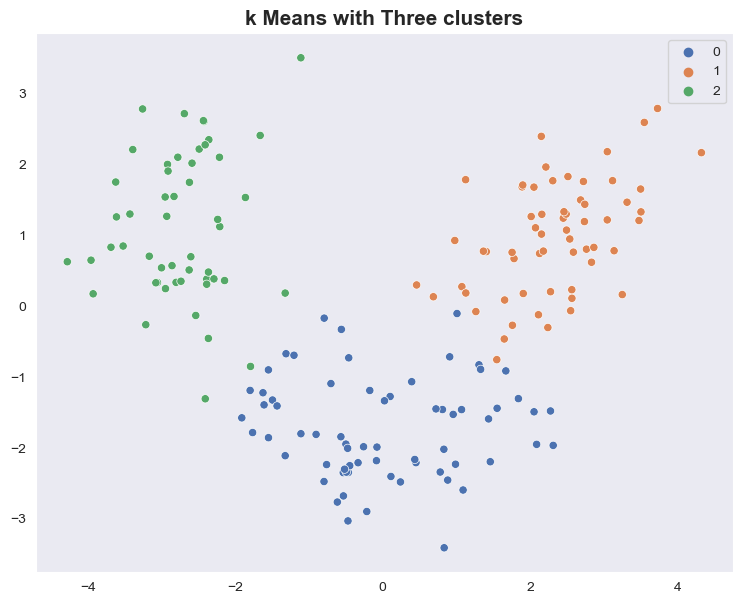

In [220]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(scaled_data)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=y_kmeans, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("k Means with Three clusters",fontsize=15,fontweight="bold")
plt.show()

In [214]:
# Calculate Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score for 3 clusters separated by k Means
s = silhouette_score(scaled_data, y_kmeans)
c = calinski_harabasz_score(scaled_data, y_kmeans)
d = davies_bouldin_score(scaled_data, y_kmeans) 
print('silhouette_score = ', round(s,3),'\ncalinski_harabasz_score = ', round(c,3), '\ndavies_bouldin_score = ' ,round(d,3))

silhouette_score =  0.284 
calinski_harabasz_score =  71.537 
davies_bouldin_score =  1.39


###### Hierarchical clustering


<function matplotlib.pyplot.show(close=None, block=None)>

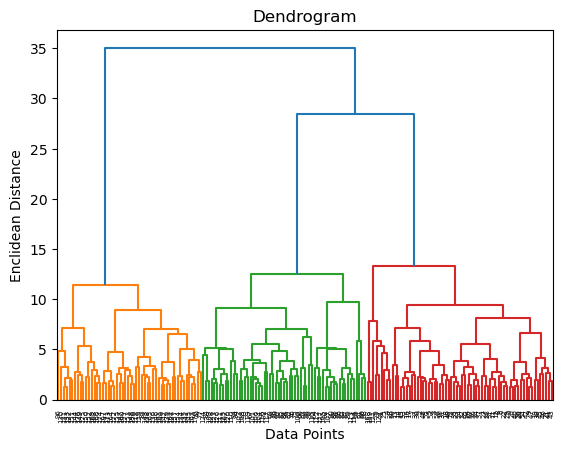

In [96]:
#Find the optimum number of clusters
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Enclidean Distance')
plt.show

Analysis - Best value of cluster is 3

In [111]:
def agglomerationScorecard(scaled_data):
    arr = np.empty((10, 10), dtype=object)
    # Number of clusters to search for and silhouette_scores list
    range_n_clusters = [2, 3, 4, 5]
    linkages = ['ward','average','complete','single']
    silhouette_scores = []
    cal_har_scores =[]
    dav_boulds =[]
    clusters=[]
    linkages1 = []
    totals = []
    cophenetics=[]
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    for n_clusters in range_n_clusters:
         for link in linkages:                      
            cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=link)
            labels_ = cluster.fit_predict(scaled_data)
            silhouette_avg = silhouette_score(scaled_data, labels_)
            cal_har_score = calinski_harabasz_score(scaled_data, labels_)
            dav_bould = davies_bouldin_score(scaled_data, labels_) 
            Z = linkage(scaled_data, method = link, metric = 'euclidean')
            cophenetic, coph_dists = cophenet(Z, pdist(scaled_data))
            clusters.append(n_clusters)
            linkages1.append(link)
            silhouette_scores.append(silhouette_avg)
            cal_har_scores.append(cal_har_score)
            dav_boulds.append(dav_bould)
            totals.append(silhouette_avg + cal_har_score + dav_bould )
            cophenetics.append(cophenetic) 
    scorecard['clusters'] = clusters
    scorecard['linkage'] = linkages1
    scorecard['silhouette'] = silhouette_scores
    scorecard['calinski_harabasz'] =cal_har_scores
    scorecard['davies_bouldin']  = dav_boulds
    scorecard['Total']  = totals
    scorecard['cophenetic']  = cophenetics
    return scorecard

In [114]:
#Using Agglomerative Clustering
# View the total of silhouette calinski_harabasz_score and davies_bouldin_score from highest to lowest scores
# View cophenetic coefficient for the same
s= agglomerationScorecard(scaled_data)
s = s.sort_values(['Total'], ascending=False ,ignore_index=True)
s


,clusters,linkage,silhouette,calinski_harabasz,davies_bouldin,Total,cophenetic
0,3,ward,0.272611,68.897243,1.396945,70.566798,0.673105
1,2,ward,0.262535,63.705212,1.394811,65.362558,0.673105
2,2,complete,0.232045,57.594290,1.588493,59.414828,0.656805
3,3,complete,0.220638,56.601980,1.455260,58.277878,0.656805
4,4,ward,0.261699,53.282232,1.529728,55.073658,0.673105
5,5,ward,0.227194,45.510351,1.680201,47.417746,0.673105
6,4,complete,0.233543,44.706262,1.747429,46.687234,0.656805
7,5,complete,0.225390,34.961968,1.506195,36.693553,0.656805
8,4,average,0.215970,25.001040,1.103824,26.320834,0.747430
9,5,average,0.191589,19.619806,0.999823,20.811218,0.747430


In [119]:
# Data points spread
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [120]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 67],
       [ 1, 52],
       [ 2, 59]], dtype=int64)

In [130]:
#Function to plot truncated dendrogram
def plot_dendrogram(model, **kwargs):
  
    count = np.zeros(model.children_.shape[0])
    nsamples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        currentcount = 0
        for child_idx in merge:
            if child_idx < nsamples:
                currentcount += 1  
            else:
                currentcount += count[child_idx - nsamples]
        count[i] = currentcount

    linkagematrix = np.column_stack(
        [model.children_, model.distances_, count]
    ).astype(float)
    dendrogram(linkagematrix, **kwargs)    

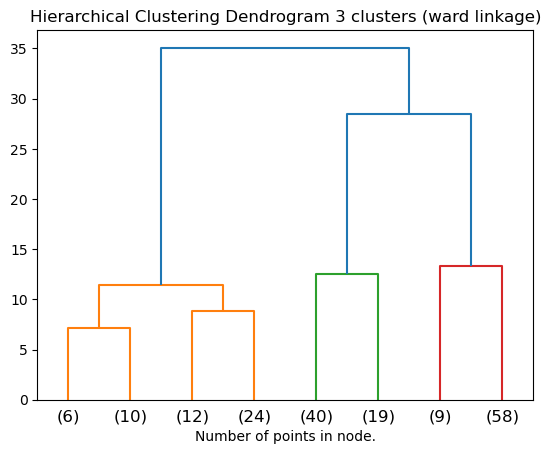

In [131]:
from scipy.cluster.hierarchy import dendrogram
plt.title("Hierarchical Clustering Dendrogram 3 clusters (ward linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=2)
plt.xlabel("Number of points in node.")
plt.show()

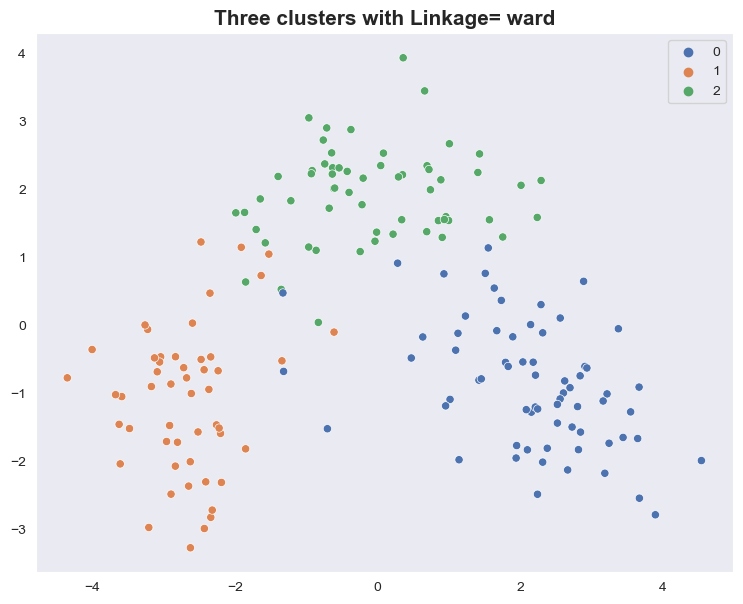

In [133]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(scaled_data)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("Three clusters with Linkage= ward",fontsize=15,fontweight="bold")
plt.show()

###### DBSCAN Clustering

Deciding Optimal value for epsilon

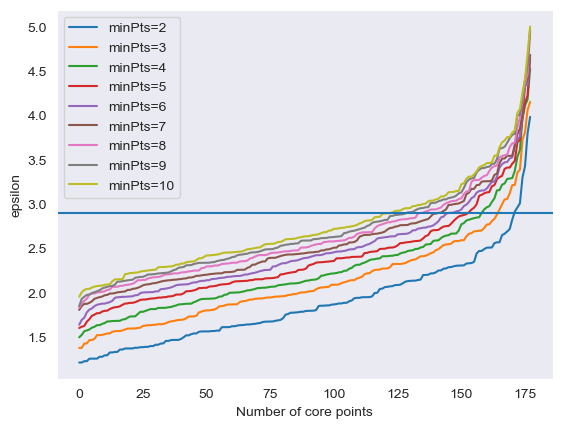

In [150]:
from sklearn.neighbors import NearestNeighbors

# we use sklearn to find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(2.9)
#plt.axhline(2.7)
plt.legend()
plt.show()

In [ ]:
#Apply DBSCAN clustering

In [165]:
# DBSCAN model with parameters
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(scaled_data)
clusters = dbscan.labels_
len(set(clusters))

3

In [166]:
# Data points count per label
unique, counts = np.unique(clusters, return_counts=True)
np.asarray((unique, counts)).T


array([[ -1,   5],
       [  0, 171],
       [  1,   2]], dtype=int64)

In [167]:
s = silhouette_score(scaled_data,clusters)
c = calinski_harabasz_score(scaled_data, clusters)
d = davies_bouldin_score(scaled_data, clusters) 
s,c,d

(0.06431992117628321, 2.1875194951538783, 2.617194556250393)

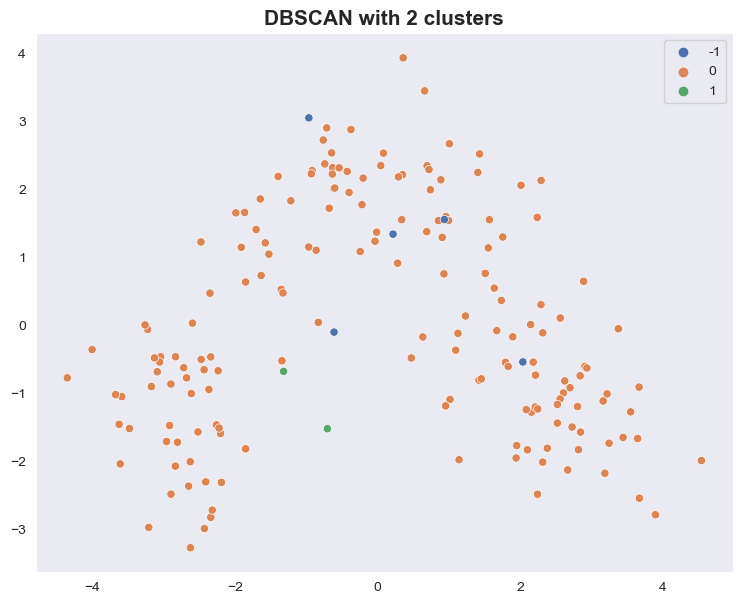

In [168]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca1 = decomposition.PCA(n_components=3)
wine_pca1 = pca1.fit_transform(scaled_data)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=wine_pca1[:,0], y=wine_pca1[:,1],palette="deep")
plt.title("DBSCAN with 2 clusters",fontsize=15,fontweight="bold")
plt.show()

###### Conclusion

In [ ]:
Among the 3 models evaluated we see that kMeans has the best silhouette and Calinski harabasz scores.